# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

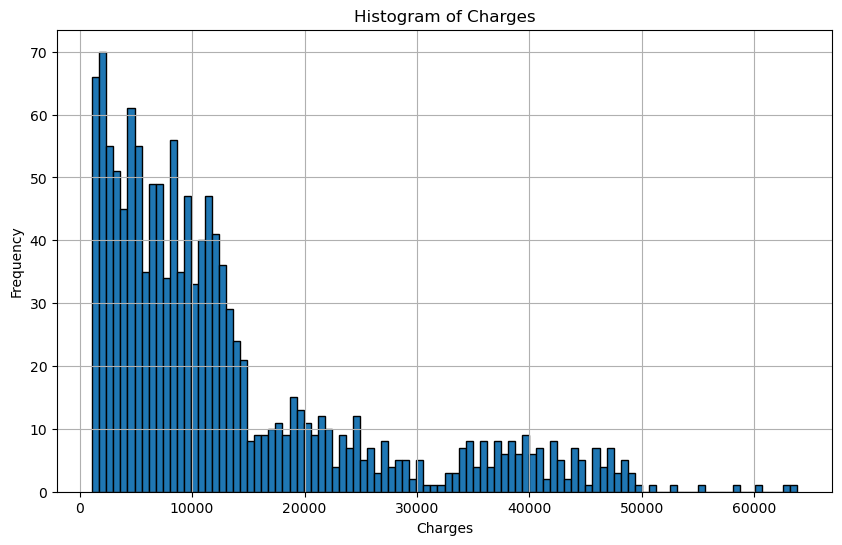

In [6]:
df = medical

# Plot histogram of charges
plt.figure(figsize=(10, 6))
plt.hist(df['charges'], bins=100, edgecolor='black')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Charges')
plt.grid(True)
plt.show()

In [7]:
# Calculate mean and standard deviation of charges
mean_charges = np.mean(df['charges'])
std_dev_charges = np.std(df['charges'])

mean_charges, std_dev_charges

(13270.422265141257, 12105.484975561605)

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__Random Sample: If our sample is truly random and at 1338 datapoints, it should provide unbiased estimates of population parameters, such as the population mean.

Sample Size: This is a sufficiently large enough sample size that is required for the Central Limit Theorem (CLT) to apply, which allows us to make inferences about population parameters based on sample statistics.

Given these considerations, we can justify using the data to answer the administrator's concern. The most appropriate frequentist test to apply in this scenario would be a one-sample t-test. This test allows us to determine whether the mean of a single sample differs significantly from a specified population mean (in this case, $12,000). We can use the t-test to calculate a confidence interval for the population mean and assess whether it includes the value of $12,000. If the confidence interval does not include $12,000, we can conclude that there is evidence to suggest that the actual average charge has fallen below $12,000.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__Given the nature of the administrator's concern that the actual average charge has fallen below $12,000, a one-sided confidence interval would be appropriate. A one-sided confidence interval focuses only on one direction of the distribution, in this case, the lower tail of the distribution, where the concern lies.

In [8]:
# Degrees of freedom
degrees_of_freedom = len(df['charges']) - 1

# Critical value for one-sided 95% confidence interval
t_critical = t.ppf(0.05, df=degrees_of_freedom)
t_critical

-1.6459941145571324

In [9]:
# Sample mean and standard deviation
sample_mean = np.mean(medical['charges'])
sample_std = np.std(medical['charges'], ddof=1)
sample_mean, sample_std

(13270.422265141257, 12110.011236693994)

In [10]:
# Margin of error
margin_of_error = t_critical * (sample_std / np.sqrt(len(df['charges'])))

# Lower bound of the one-sided 95% confidence interval
lower_bound = sample_mean - margin_of_error

lower_bound

13815.357346466282

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__The assumption about the variances of the two groups that we are making here is that they are equal. 

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [11]:
# Read the data from your dataset
data = medical

# Separate the data into two groups: people with insurance and people without insurance
insurance_group = data[data['insuranceclaim'] == 1]
no_insurance_group = data[data['insuranceclaim'] == 0]

# Sample size for people with insurance and without insurance
n0 = len(insurance_group)
n1 = len(no_insurance_group)

# Mean charge for people with insurance and without insurance
x0 = insurance_group['charges'].mean()
x1 = no_insurance_group['charges'].mean()

# Standard deviation of charges for people with insurance and without insurance
s0 = insurance_group['charges'].std()
s1 = no_insurance_group['charges'].std()

n0, n1, x0, x1, s0, s1

(783,
 555,
 16423.928276537677,
 8821.421892306305,
 14045.928418802127,
 6446.510126811736)

In [13]:
from scipy.stats import ttest_ind

# Assuming significance level (alpha) of 0.05
alpha = 0.05

# Perform t-test
t_statistic, p_value = ttest_ind(insurance_group['charges'], no_insurance_group['charges'], equal_var=False)

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in mean charges between people with insurance and people without insurance.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in mean charges between people with insurance and people without insurance.")

t_statistic, p_value

Reject the null hypothesis: There is a significant difference in mean charges between people with insurance and people without insurance.


(13.298031957975649, 1.1105103216309125e-37)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__There is not an equivilent function for performing a z-test in the scipy.stats documentation. I believe that is because the z-test is done only on datasets when the population parameters are known and/or when the sample size is large enough to approach the population parameters.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test